In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from functools import reduce
from datetime import datetime

%run ./trace_helps.ipynb

# Get the last n traceroutes
N_RECS = 1000

pd.set_option('max_colwidth', 1000)

with open('/home/anthony/TRACE_LOG.TXT') as f:
    reader = csv.reader(f, delimiter='\n')
    dat = []
    a = []
    for row in reader:
        if row != []:
            a.extend(row)
        elif row == []:
            dat.append(a)
            a = []

al = []
for i, x in enumerate(dat[-N_RECS:]):
    if is_norm(x):
        al.append(clean_dat(x, i))

full = pd.concat(al).pipe(post_process)

FRONT = ['trace_id', 'start', 'end', 'trace_line']
clean = full[FRONT + [x for x in full.columns if x not in FRONT]].drop(['trace_entry', 'whereto'], axis=1)

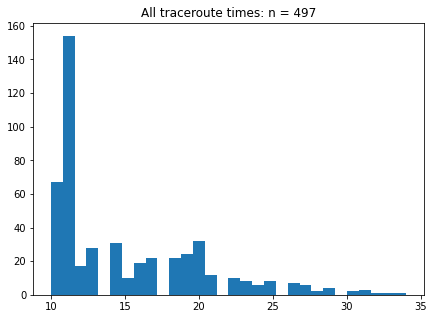

In [2]:
WIDTH = 7
HEIGHT = 5
fig, axs = plt.subplots(figsize=(WIDTH, HEIGHT))
axs.hist(full.drop_duplicates(subset=['trace_id'])['n_seconds'], bins=30);
axs.set_title('All traceroute times: n = {}'.format(full.trace_id.nunique()));

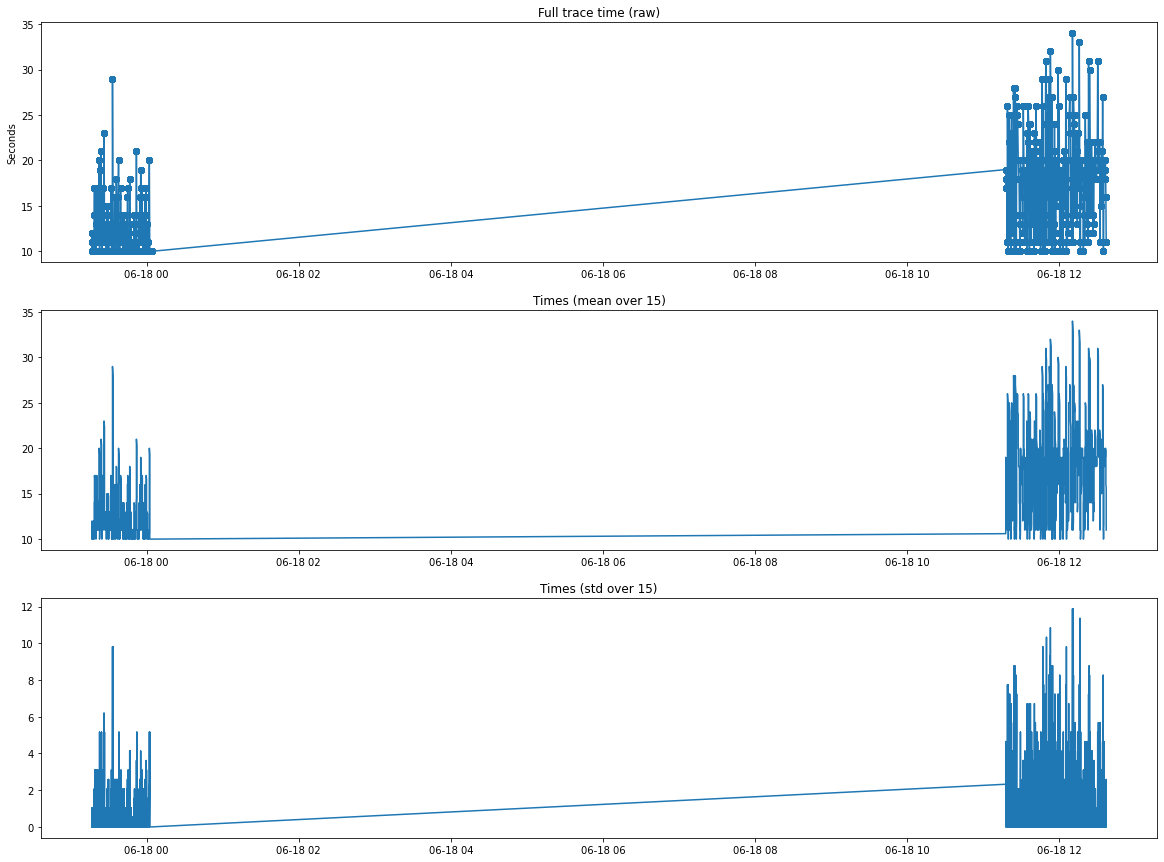

In [3]:
WIDTH = 20
HEIGHT = 15
NROWS = 3
NCOLS = 1
WINDOW = 15

fig, axs = plt.subplots(figsize=(WIDTH, HEIGHT), nrows=NROWS, ncols=NCOLS)
axs[0].plot(full['start'], full['n_seconds'], marker ='o');
axs[0].set_title('Full trace time (raw)');
axs[0].set_ylabel('Seconds')

axs[1].plot(full['start'], full['n_seconds'].rolling(WINDOW).mean());
axs[1].set_title('Times (mean over {})'.format(WINDOW));

axs[2].plot(full['start'], full['n_seconds'].rolling(WINDOW).std());
axs[2].set_title('Times (std over {})'.format(WINDOW));

In [4]:
MISSING = '*  *  * '
pd.set_option('max_rows', 100)
t = full.query('trace_entry == @MISSING').groupby(['start', 'trace_id']).apply(lambda x: x.shape[0]).reset_index()